In [ ]:
# https://www.youtube.com/watch?v=ujId4ipkBio
# a sentiment analysis program that parses the tweets feetched from twitter

In [1]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# twitter API credentials
api_key = "jP0T1NzCdK3ZHOBLTv2BK3ByW"
api_key_secret = "FBXOAXVvOyeNrjGpkiXZTlyTTMCWlDUrWkcZ9fOCCNaFdTPXLG"
access_token = "34462162-aUKj28LwskEIXitP59TWMF0ZNOj3lQkrgMmZEuvQq"
access_token_secret = "5pAyb6zmdNxiDF4A7q81qb9wewYghiWalA3P1UxTGzp2L"

In [3]:
# authentication object
authenticate = tweepy.OAuthHandler(api_key, api_key_secret)
# set the access token
authenticate.set_access_token(access_token, access_token_secret)
# create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [25]:
# extract 200 tweets (maximum) from user realDonaldTrump
tweets = api.user_timeline(screen_name='realDonaldTrump', count=200, lang='en', tweet_mode='extended')
len(tweets)

200

In [26]:
# create a dataframe
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])

In [27]:
# function to clean the tweets
def clean_text(text):
    # remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # remove the '#' symbols
    text = re.sub(r'#', '', text)
    # remove RT (retweets)
    text = re.sub(r'RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

In [28]:
# clean tweets
df.Tweets = df.Tweets.apply(clean_text)

In [29]:
# function to get the subjectivity: how subjective a text is
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# functino to get the polarity: how positive or negative a text is
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
# create 2 new columns
df['Subjectivity'] = df.Tweets.apply(get_subjectivity)
df['Polarity'] = df.Tweets.apply(get_polarity)

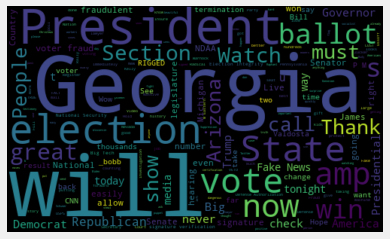

In [31]:
# plot the word cloud
all_words = ' '.join([tweet for tweet in df.Tweets])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
# function to compute the negative, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [33]:
df['Analysis'] = df.Polarity.apply(get_analysis)

In [34]:
# function to filter out positives only, negatives only, neutrals only
def filter(data, ascending, value):
    output = []
    df_sorted = df.sort_values(by=['Polarity'], ascending=ascending)
    for i in range(df_sorted.shape[0]):
        if df_sorted.Analysis[i] == value:
            output.append(str(i+1) + ': ' + df_sorted.Tweets[i])
    return output

In [35]:
positive = filter(df, True, 'Positive')

In [36]:
negative = filter(df, False, 'Negative')

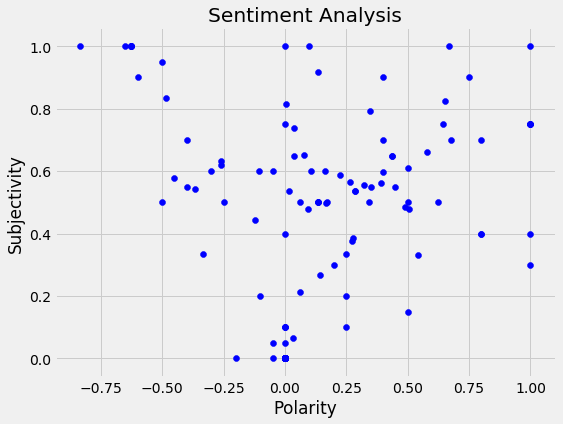

In [37]:
# plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(df.shape[0]):
    plt.scatter(df.Polarity[i], df.Subjectivity[i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
# get the percentage of positive tweets
positive = df[df.Analysis == 'Positive']
positive = positive.Tweets

In [18]:
round((positive.shape[0] / df.shape[0]) * 100, 1)

31.5

In [19]:
len(positive)

63

In [20]:
negative = df[df.Analysis == 'Negative']
negative = negative.Tweets
round((negative.shape[0] / df.shape[0]) * 100, 1)

13.5

In [21]:
len(negative)

27

In [22]:
# show the value counts
df.Analysis.value_counts()

Neutral     110
Positive     63
Negative     27
Name: Analysis, dtype: int64

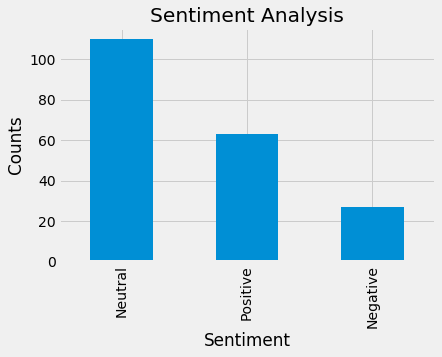

In [23]:
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df.Analysis.value_counts().plot(kind='bar')
plt.show()